In [303]:
## Importing necessary lib
import pandas as pd

In [200]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Reference for solving this problem has been taken from Upgrad in module "Telecom churn" logistic regression model and the pre assignment session conducted by the SME

In [201]:
lead = pd.read_csv("Leads.csv")

In [202]:
lead.shape

(9240, 37)

In [203]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [204]:
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [205]:
## Now, lets see the type of each column

lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [206]:
### Checking percentage of missing values in each column

round(100*(lead.isnull().sum()/len(lead.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [207]:
# dropping columns with null value greater than 35%

cols=lead.columns
for i in cols:
    if((100*(lead[i].isnull().sum()/len(lead.index))) >= 35):
        lead.drop(i, 1, inplace=True)


In [208]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,Select,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,Select,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,Select,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,Select,Mumbai,No,No,Modified


In [209]:
# Checking the null value percentage again

round(100*(lead.isnull().sum()/len(lead.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [210]:
#Checking the labels of the remaining categorical columns
for col in lead.iloc[:,1:].select_dtypes(include='object').columns:
    print(col)
    print("_________________________________________________________________________________________________")
    print(lead[col].value_counts(normalize= True)*100)
    print("_________________________________________________________________________________________________")

Lead Origin
_________________________________________________________________________________________________
Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64
_________________________________________________________________________________________________
Lead Source
_________________________________________________________________________________________________
Google               31.160365
Direct Traffic       27.629292
Olark Chat           19.067797
Organic Search       12.538027
Reference             5.801825
Welingak Website      1.542807
Referral Sites        1.358105
Facebook              0.597566
bing                  0.065189
google                0.054324
Click2call            0.043459
Press_Release         0.021730
Social Media          0.021730
Live Chat             0.021730
youtubechannel        0.01086

In [211]:
#Converting all select to NaN as the user didn't select any option from the list
lead.replace('Select', np.nan, inplace = True)

In [212]:
## Dropping the single dominating value columns because it doesnt help in our analysis

lead = lead.drop(["Magazine", "Receive More Updates About Our Courses", "Update me on Supply Chain Content", "Get updates on DM Content", "I agree to pay the amount through cheque"], axis=1)


In [213]:
lead.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Lead Profile',
       'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [214]:
# Also, here we'll drop prospect ID and Lead number since they are unique for all the entries

lead = lead.drop(['Prospect ID', 'Lead Number'], axis=1)

In [215]:
# Checking unique values again for dominance 

lead.nunique()

Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                                           2
Digital Advertisement       

### Missing value imputation 

In [216]:
lead["Specialization"].mode()[0]

'Finance Management'

In [217]:
lead["Specialization"].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [218]:
# replacing missing values in Specialization with Finance Management
lead["Specialization"].fillna("Finance Management", inplace = True)

In [219]:
# replacing missing values in Lead source with Google
lead["Lead Source"].fillna("Google", inplace = True)

In [220]:
# replacing missing values in col with mean of the column
lead["Page Views Per Visit"].fillna(lead["Page Views Per Visit"].mean(), inplace = True)

In [221]:
# replacing missing values in col with mean of the column
lead["TotalVisits"].fillna(lead["TotalVisits"].mean(), inplace = True)

In [222]:
# replacing missing values in City with Mumbai
lead["City"].fillna("Mumbai", inplace = True)

In [223]:
# replacing missing values in lead profile with Potential Lead as this is the mode
lead["Lead Profile"].fillna("Potential Lead", inplace = True)

In [224]:
# replacing missing values in this col with SBetter Career Prospects as this is the mode
lead["What matters most to you in choosing a course"].fillna("Better Career Prospects", inplace = True)

In [225]:
# replacing missing values in this col with unemployed as this is the mode
lead["What is your current occupation"].fillna("Unemployed", inplace = True)

In [226]:
# replacing missing values in this col with Online Search as this is the mode
lead["How did you hear about X Education"].fillna("Online Search", inplace = True)

In [227]:
# replacing missing values in this col with India as this is the mode
lead["Country"].fillna("India", inplace = True)

In [228]:
# replacing missing values in this col with Email opened as this is the mode
lead["Last Activity"].fillna("Email Opened", inplace = True)

In [229]:
#now, all the missing values have been imputed with either mode(for categorical) pr mean(for continuous)
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 24 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9240 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9240 non-null   float64
 8   Last Activity                                  9240 non-null   object 
 9   Country                                        9240 

In [230]:
# Checking the null values count after preprocessing the data
100*lead.isnull().sum()/len(lead)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
How did you hear about X Education               0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

### Step: Data Preparation

converting somer binary variables (yes/No) to 1/0

In [231]:
# first lets check the columns with yes/no 

lead["Do Not Email"].value_counts()

No     8506
Yes     734
Name: Do Not Email, dtype: int64

In [232]:
lead["Do Not Call"].value_counts()

No     9238
Yes       2
Name: Do Not Call, dtype: int64

In [233]:
lead["Converted"].value_counts() 

0    5679
1    3561
Name: Converted, dtype: int64

In [234]:
lead["Search"].value_counts()

No     9226
Yes      14
Name: Search, dtype: int64

In [235]:
lead["Newspaper Article"].value_counts()

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

In [236]:
lead["X Education Forums"].value_counts()

No     9239
Yes       1
Name: X Education Forums, dtype: int64

In [237]:
lead["Newspaper"].value_counts()

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [238]:
lead["Digital Advertisement"].value_counts()

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

In [239]:
lead["Through Recommendations"].value_counts()

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

In [240]:
lead["A free copy of Mastering The Interview"].value_counts()

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [241]:
lead["Lead Origin"].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [242]:
# list of variables to map

varlist = ["Do Not Email", "Do Not Call", "Search", "Newspaper Article", "X Education Forums", "Newspaper", "Digital Advertisement", "Through Recommendations", "A free copy of Mastering The Interview"]

# Defining map function

def binary_map(x):
    return x.map({"Yes": 1, "No":0})

#now applying function to the varlist of lead

lead[varlist] = lead[varlist].apply(binary_map)

In [243]:
lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,India,...,0,0,0,0,0,0,Potential Lead,Mumbai,0,Modified
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,...,0,0,0,0,0,0,Potential Lead,Mumbai,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,...,0,0,0,0,0,0,Potential Lead,Mumbai,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,...,0,0,0,0,0,0,Potential Lead,Mumbai,0,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,...,0,0,0,0,0,0,Potential Lead,Mumbai,0,Modified


### EDA 

### For categorical variables, we'll simply plot a countplot for all the variables 

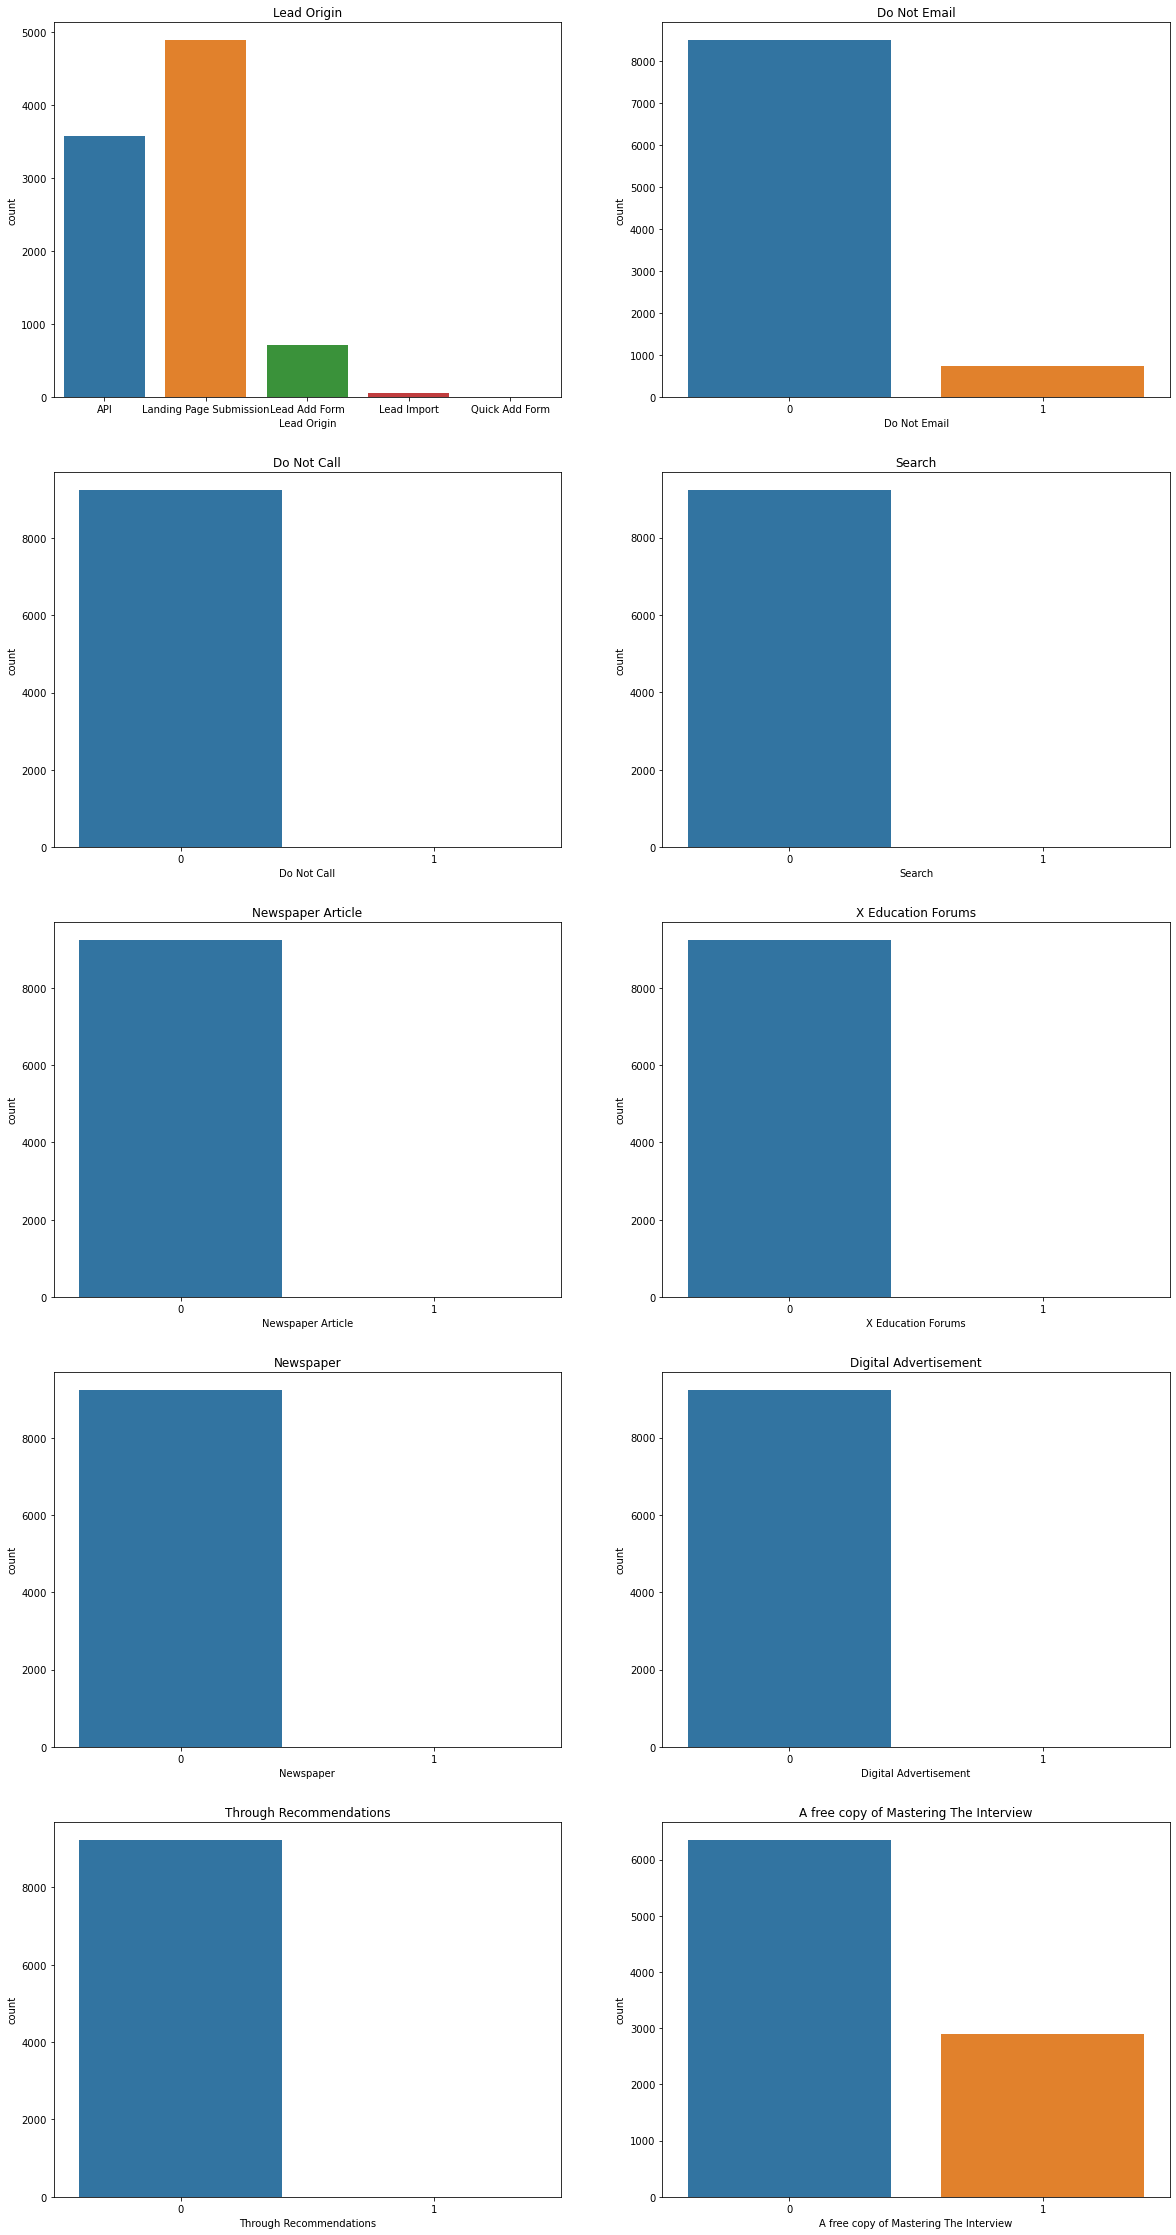

In [244]:
plt.figure(figsize= (20,40))

plt.subplot(5,2,1)
sns.countplot(lead["Lead Origin"])
plt.title("Lead Origin")

plt.subplot(5,2,2)
sns.countplot(lead["Do Not Email"])
plt.title("Do Not Email")


plt.subplot(5,2,3)
sns.countplot(lead["Do Not Call"])
plt.title("Do Not Call")

plt.subplot(5,2,4)
sns.countplot(lead["Search"])
plt.title("Search")

plt.subplot(5,2,5)
sns.countplot(lead["Newspaper Article"])
plt.title("Newspaper Article")

plt.subplot(5,2,6)
sns.countplot(lead["X Education Forums"])
plt.title("X Education Forums")

plt.subplot(5,2,7)
sns.countplot(lead["Newspaper"])
plt.title("Newspaper")

plt.subplot(5,2,8)
sns.countplot(lead["Digital Advertisement"])
plt.title("Digital Advertisement")

plt.subplot(5,2,9)
sns.countplot(lead["Through Recommendations"])
plt.title("Through Recommendations")

plt.subplot(5,2,10)
sns.countplot(lead["A free copy of Mastering The Interview"])
plt.title("A free copy of Mastering The Interview")


plt.show()

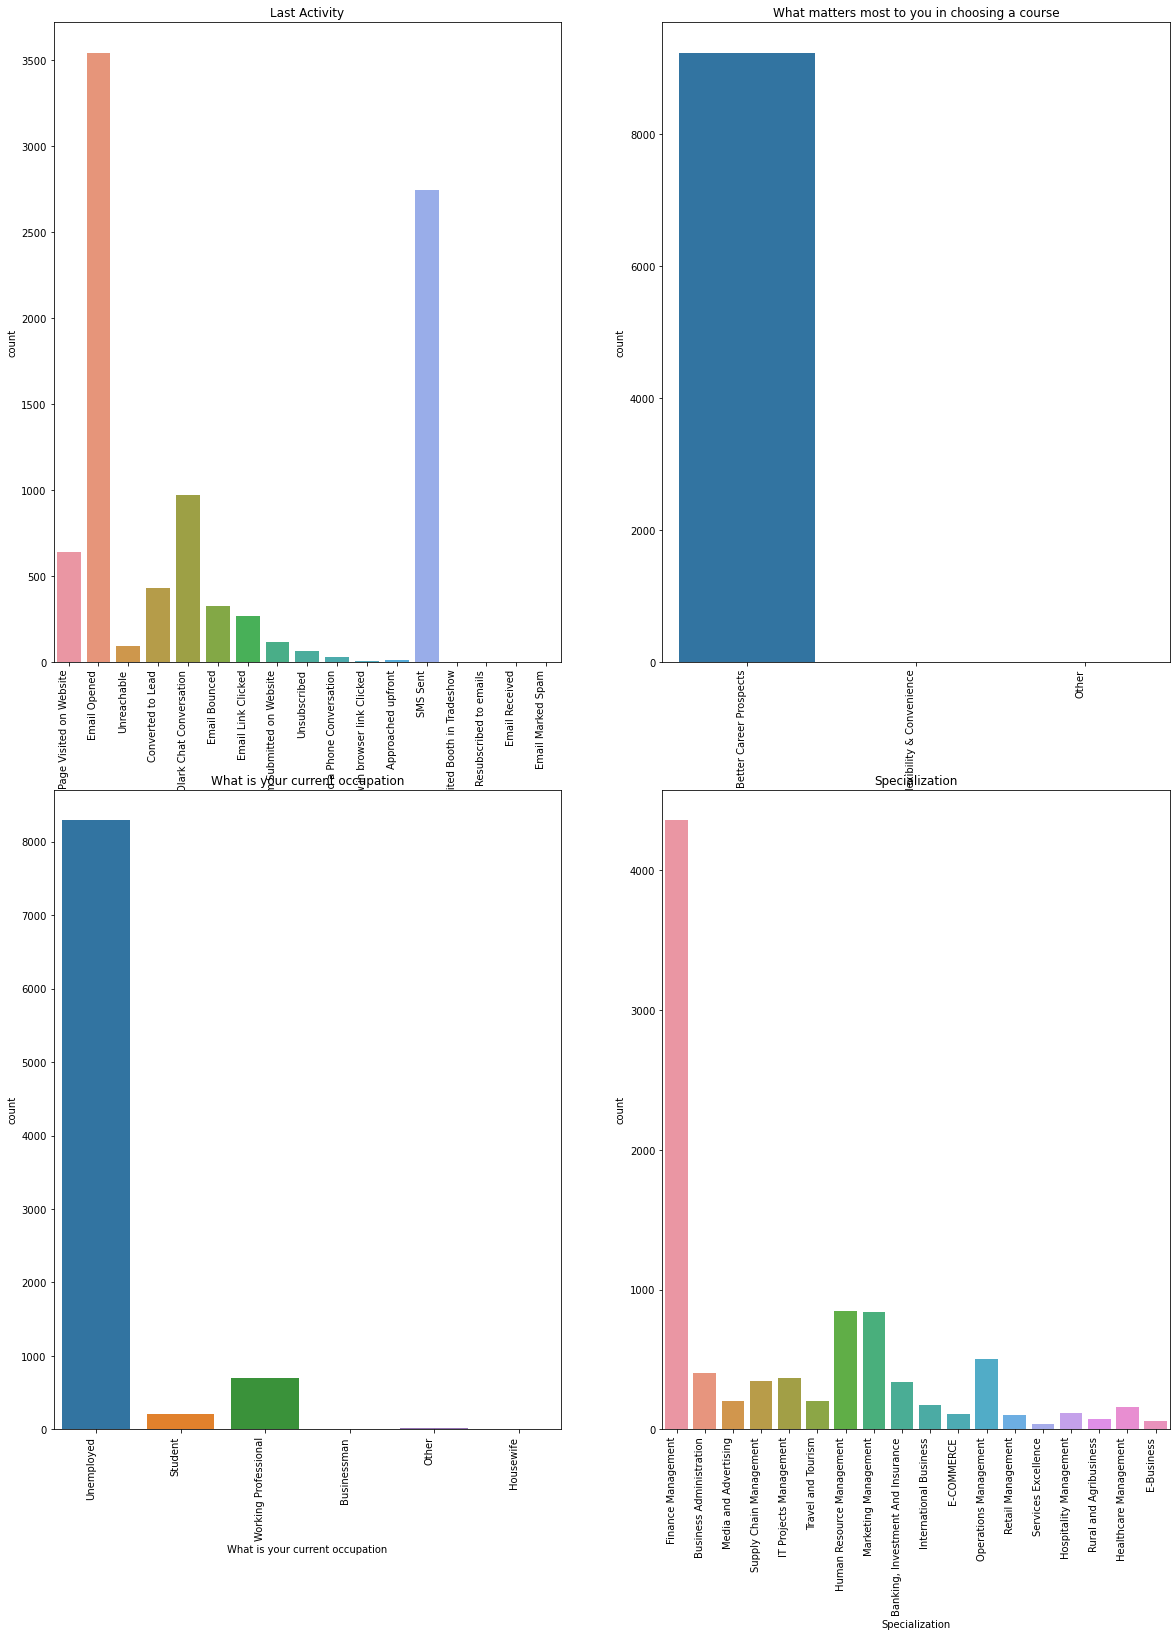

In [245]:
# plotting the same for long text columns with comparatively a  range of categories

plt.figure(figsize= (20,40))

plt.subplot(3,2,1)
sns.countplot(lead['Last Activity'])
plt.title('Last Activity')
plt.xticks(rotation=90, ha='right')

plt.subplot(3,2,2)
sns.countplot(lead['What matters most to you in choosing a course'])
plt.title('What matters most to you in choosing a course')
plt.xticks(rotation=90, ha='right')

plt.subplot(3,2,3)
sns.countplot(lead['What is your current occupation'])
plt.title('What is your current occupation')
plt.xticks(rotation=90, ha='right')

plt.subplot(3,2,4)
sns.countplot(lead['Specialization'])
plt.title('Specialization')
plt.xticks(rotation=90, ha='right')

plt.show()


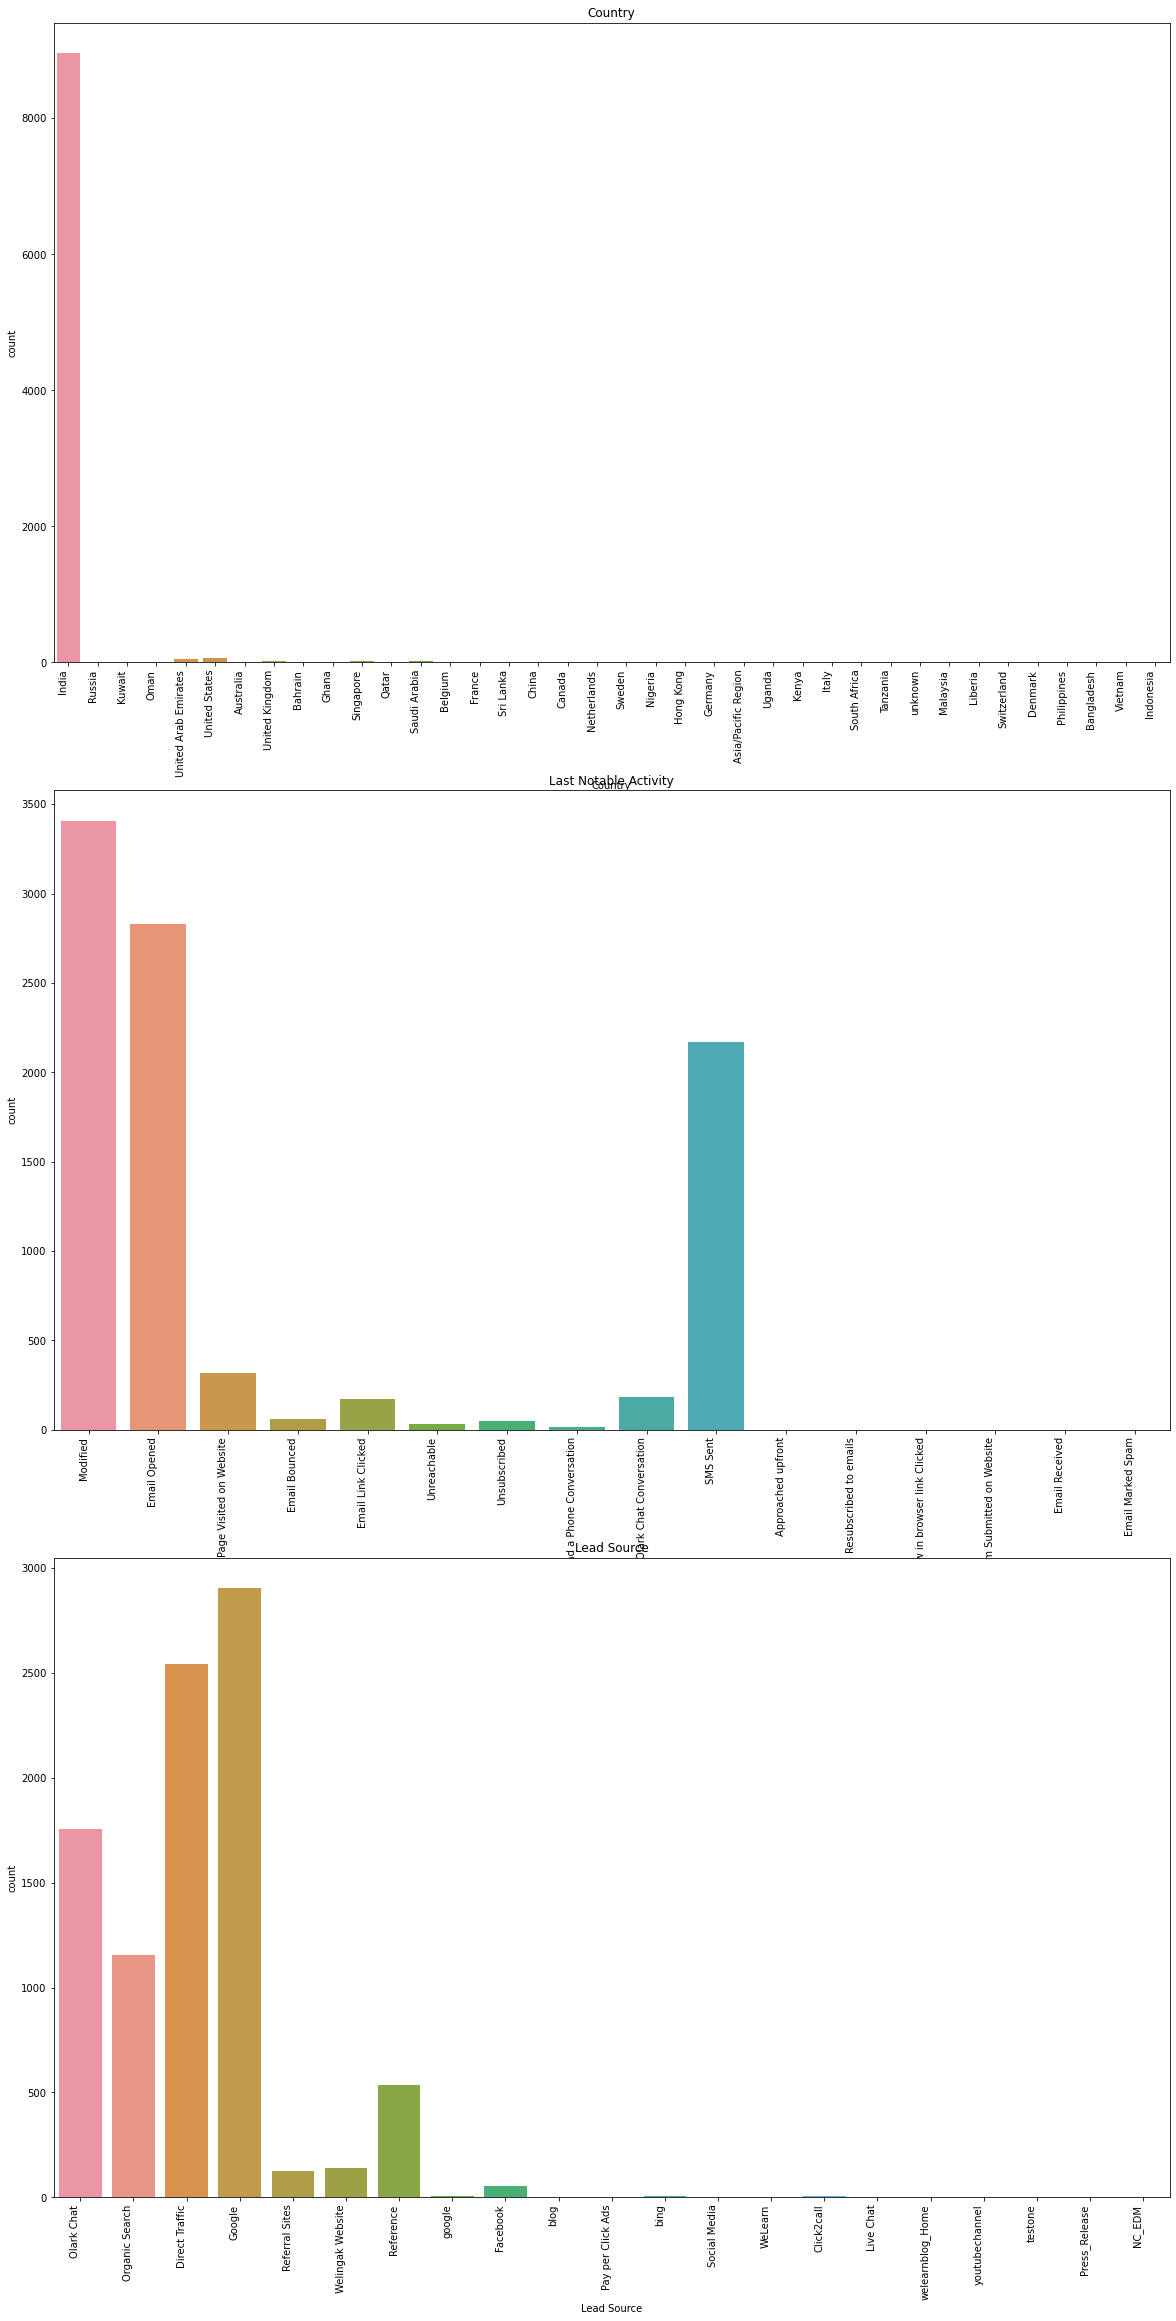

In [246]:
plt.figure(figsize= (20,40))

plt.subplot(3,1,1)
sns.countplot(lead['Country'])
plt.title('Country')
plt.xticks(rotation=90, ha='right')

plt.subplot(3,1,2)
sns.countplot(lead['Last Notable Activity'])
plt.title('Last Notable Activity')
plt.xticks(rotation=90, ha='right')

plt.subplot(3,1,3)
sns.countplot(lead['Lead Source'])
plt.title('Lead Source')
plt.xticks(rotation=90, ha='right')

plt.show()

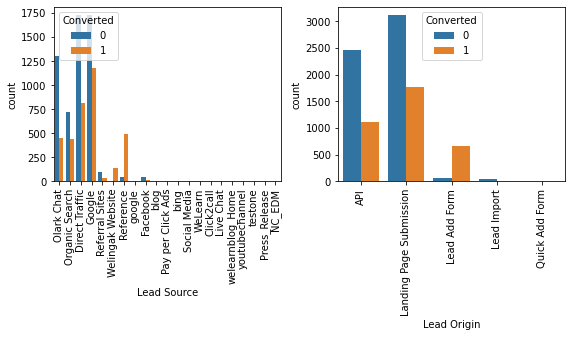

In [247]:
## PLotting them with the target variable

fig = plt.subplots(figsize = (12, 12))

for i, feature in enumerate(['Lead Source', 'Lead Origin']):
    plt.subplot(3, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.countplot(lead[feature], hue = lead["Converted"])
    plt.xticks(rotation = 90)
    plt.tight_layout()

### To improve the overall lead conversion rate, we need to focus on increasing the conversion rate of 'API' and 'Landing Page Submission' and also increasing the number of leads from 'Lead Add Form'

In [248]:
# We can clearly observe that the count of leads from various sources are close to negligible and hence we can club them into "Others" source for better visualisation and analysis

lead['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Other_Lead_Source', inplace = True)

lead['Lead Source'].replace("google", 'Google', inplace = True)

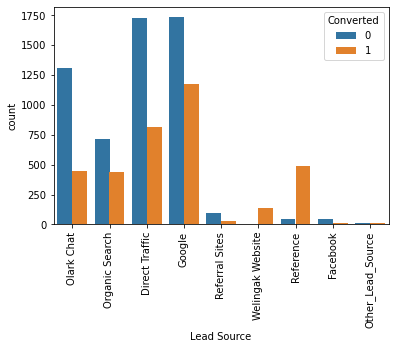

In [249]:
# Plotting Lead Source again

sns.countplot(x = "Lead Source", hue = "Converted", data = lead)
plt.xticks(rotation = 90)
plt.show()

### Observations out of above analysis
- The count of leads from the Google and Direct Traffic is maximum
- The conversion rate of the leads from Reference and Welingak Website is maximum

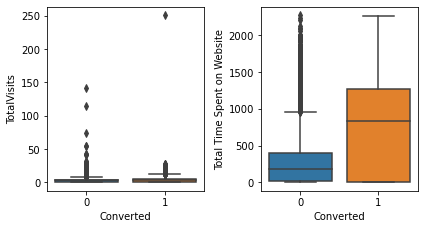

In [250]:
fig=plt.subplots(figsize=(6, 6))

for i, feature in enumerate(["TotalVisits", "Total Time Spent on Website"]):
    plt.subplot(2, 2, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.boxplot(y = feature, x = 'Converted', data = lead)
    plt.tight_layout()

#### Users spending more time on the website are more likely to get converted

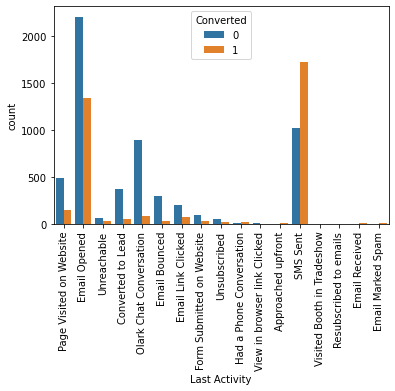

In [251]:
# Plotting Last Activity column 

sns.countplot(x = "Last Activity", hue = "Converted", data= lead)
plt.xticks(rotation = 'vertical')
plt.show()

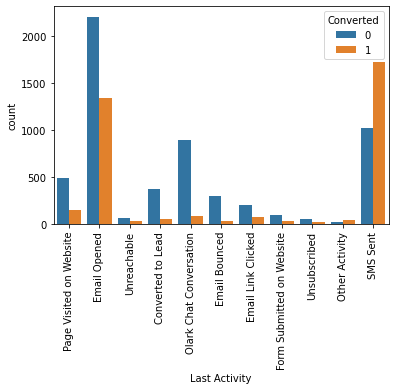

In [252]:
# Converting all the low count categories to the 'Others' category
lead['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other Activity', inplace = True)

# lets plot the Last Activity again 
sns.countplot(x = "Last Activity", hue = "Converted", data = lead)
plt.xticks( rotation = 'vertical')
plt.show()

### OBSERVATIONS:
- The count of lst activity as "Email Opened" is max
- The conversion rate of SMS sent as last activity is maximum

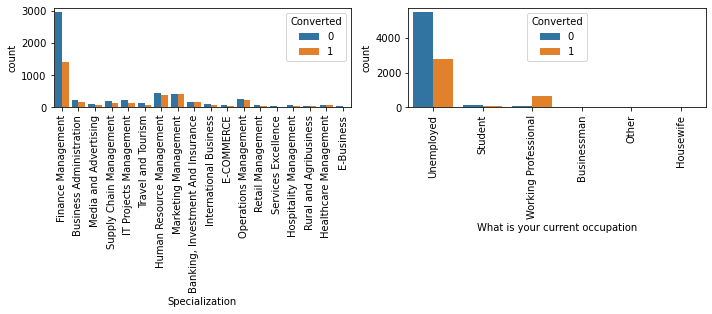

In [253]:
fig=plt.subplots(figsize=(10, 6))

for i, feature in enumerate(["Specialization", "What is your current occupation"]):
    plt.subplot(2, 2, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.countplot(x = feature, hue = "Converted", data = lead)
    plt.xticks( rotation = 'vertical')
    plt.tight_layout()

### Observation:

- To increase overall conversion rate, we need to increase the number of Working Professional leads by reaching out to them through different mediums and also on increasing the conversion rate of Unemployed leads

In [254]:
# there are multiple columns which contains data of a single value only. As these columns do not contribute towards any inference, we can remove them from further analysis
#Dropping unnecessary columns

lead.drop(['What matters most to you in choosing a course','Search','Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview','Country','Do Not Call'], axis = 1, inplace = True)

lead

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,Lead Profile,City,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.00,Page Visited on Website,Finance Management,Online Search,Unemployed,Potential Lead,Mumbai,Modified
1,API,Organic Search,0,0,5.0,674,2.50,Email Opened,Finance Management,Online Search,Unemployed,Potential Lead,Mumbai,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.00,Email Opened,Business Administration,Online Search,Student,Potential Lead,Mumbai,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.00,Unreachable,Media and Advertising,Word Of Mouth,Unemployed,Potential Lead,Mumbai,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.00,Converted to Lead,Finance Management,Other,Unemployed,Potential Lead,Mumbai,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,1,1,8.0,1845,2.67,Other Activity,IT Projects Management,Online Search,Unemployed,Potential Lead,Mumbai,Email Marked Spam
9236,Landing Page Submission,Direct Traffic,0,0,2.0,238,2.00,SMS Sent,Media and Advertising,Online Search,Unemployed,Potential Lead,Mumbai,SMS Sent
9237,Landing Page Submission,Direct Traffic,1,0,2.0,199,2.00,SMS Sent,Business Administration,Online Search,Unemployed,Potential Lead,Mumbai,SMS Sent
9238,Landing Page Submission,Google,0,1,3.0,499,3.00,SMS Sent,Human Resource Management,Online Search,Unemployed,Potential Lead,Other Metro Cities,SMS Sent


### Dummy variable creation

In [255]:
dummy = pd.get_dummies(lead[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'City','Lead Profile','How did you hear about X Education','Last Notable Activity']], drop_first=True)
dummy.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Lead_Source,Lead Source_Reference,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [256]:
#Droping the original columns after dummy variable creation
lead.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'City','Lead Profile','How did you hear about X Education','Last Notable Activity'], axis=1, inplace = True)

#merging dataframe with dummy
lead = pd.concat([lead, dummy], axis=1)
lead

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.00,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.50,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.00,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.00,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,1,2.0,1428,1.00,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,1,8.0,1845,2.67,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9236,0,0,2.0,238,2.00,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9237,1,0,2.0,199,2.00,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9238,0,1,3.0,499,3.00,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


### Train-Test Split

In [257]:
# Putting feature variable to X
X = lead.drop(['Converted'], axis=1)

y = lead['Converted']

In [258]:
# importing necessary libraries

from sklearn.model_selection import train_test_split

In [259]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling

In [260]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import minmax_scale

In [261]:
scaler = StandardScaler()

X_train[["TotalVisits", "Page Views Per Visit", "Total Time Spent on Website"]] = scaler.fit_transform(X_train[["TotalVisits", "Page Views Per Visit", "Total Time Spent on Website"]])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1871,0,-0.657764,-0.885371,-1.088305,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6795,0,0.099483,0.005716,-0.473232,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3516,0,0.288795,-0.691418,0.067847,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8105,0,0.288795,1.365219,1.223999,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3934,0,-0.657764,-0.885371,-1.088305,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [262]:
# Checking the Conversion Rate

print("Conversion rate is ", (sum(lead['Converted'])/len(lead['Converted'].index))*100)

Conversion rate is  38.53896103896104


### Checking correlation

In [263]:
# Correlation between for both the Converted and not-converted cases
conv_corr = lead.corr()

# Unstacking the correlation matrix to find out top correlations
conv_corr_unstacked = conv_corr.unstack().sort_values(kind="quicksort")
conv_corr.where(np.triu(np.ones(conv_corr.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False).head(10)

Lead Origin_Lead Import                Lead Source_Facebook                              0.981709
Last Activity_Unsubscribed             Last Notable Activity_Unsubscribed                0.877108
Lead Origin_Lead Add Form              Lead Source_Reference                             0.853237
Last Activity_SMS Sent                 Last Notable Activity_SMS Sent                    0.852707
Last Activity_Email Opened             Last Notable Activity_Email Opened                0.842496
Last Activity_Email Link Clicked       Last Notable Activity_Email Link Clicked          0.800764
Last Activity_Page Visited on Website  Last Notable Activity_Page Visited on Website     0.692057
Do Not Email                           Last Activity_Email Bounced                       0.618470
Last Activity_Unreachable              Last Notable Activity_Unreachable                 0.584642
Last Activity_Other Activity           Last Notable Activity_Had a Phone Conversation    0.522885
dtype: float64

In [264]:

X_test.drop(['Last Notable Activity_Unsubscribed','Lead Source_Reference',
                'Last Notable Activity_SMS Sent','Last Notable Activity_Email Opened','Last Activity_Email Link Clicked', 'Last Notable Activity_Page Visited on Website', 'Last Activity_Email Bounced', 'Last Notable Activity_Unreachable', 'Last Notable Activity_Had a Phone Conversation'], axis = 1, inplace = True)
X_train.drop(['Last Notable Activity_Unsubscribed','Lead Source_Reference',
                'Last Notable Activity_SMS Sent','Last Notable Activity_Email Opened','Last Activity_Email Link Clicked', 'Last Notable Activity_Page Visited on Website', 'Last Activity_Email Bounced', 'Last Notable Activity_Unreachable', 'Last Notable Activity_Had a Phone Conversation'], axis = 1, inplace = True)

In [265]:
conv_corr = X_train.corr()

In [266]:
conv_corr.where(np.triu(np.ones(conv_corr.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False).head(10)

Lead Origin_Lead Import                  Lead Source_Facebook                             0.969542
Page Views Per Visit                     Lead Origin_Landing Page Submission              0.479542
TotalVisits                              Page Views Per Visit                             0.472560
Lead Source_Olark Chat                   Last Activity_Olark Chat Conversation            0.430903
Last Activity_Olark Chat Conversation    Last Notable Activity_Olark Chat Conversation    0.407519
Lead Origin_Lead Add Form                Lead Source_Welingak Website                     0.406570
Lead Source_Olark Chat                   Specialization_Finance Management                0.398715
Last Activity_Olark Chat Conversation    Last Notable Activity_Modified                   0.315301
Total Time Spent on Website              Page Views Per Visit                             0.307522
What is your current occupation_Student  Lead Profile_Student of SomeSchool               0.304350
dtype: flo

### Model Building

In [267]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [268]:
# Logistic regression model

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6397
Model Family:                Binomial   Df Model:                           70
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2601.6
Date:                Tue, 22 Nov 2022   Deviance:                       5203.1
Time:                        14:16:26   Pearson chi2:                 7.87e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4084
Covariance Type:            nonrobust                                         
============================================================================================================================
                                                               coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
const                                                       22.3747    1.6e+04      0.001      0.999   -3.12e+04    3.13e+04
Do Not Email                                                -1.3248      0.205     -6.456      0.000      -1.727      -0.923
TotalVisits                                                  0.1700      0.049      3.455      0.001       0.074       0.267
Total Time Spent on Website                                  1.0936      0.041     26.927      0.000       1.014       1.173
Page Views Per Visit                                        -0.1487      0.054     -2.770      0.006      -0.254      -0.043
Lead Origin_Landing Page Submission                         -0.4942      0.123     -4.018      0.000      -0.735      -0.253
Lead Origin_Lead Add Form                                    3.5016      0.225     15.592      0.000       3.061       3.942
Lead Origin_Lead Import                                      1.0032      1.594      0.629      0.529      -2.121       4.127
Lead Origin_Quick Add Form                                  22.4209   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Facebook                                        -1.0691      1.595     -0.670      0.503      -4.195       2.057
Lead Source_Google                                           0.2952      0.106      2.794      0.005       0.088       0.502
Lead Source_Olark Chat                                       1.1494      0.158      7.279      0.000       0.840       1.459
Lead Source_Organic Search                                   0.1304      0.131      0.996      0.319      -0.126       0.387
Lead Source_Other_Lead_Source                                0.5504      0.660      0.834      0.404      -0.742       1.843
Lead Source_Referral Sites                                   0.0753      0.322      0.233      0.815      -0.557       0.707
Lead Source_Welingak Website                                 2.1407      0.745      2.874      0.004       0.681       3.600
Last Activity_Email Opened                                   0.5011      0.200      2.505      0.012       0.109       0.893
Last Activity_Form Submitted on Website                      0.4030      0.386      1.043      0.297      -0.354       1.160
Last Activity_Olark Chat Conversation                       -0.3285      0.253     -1.300      0.193      -0.824       0.167
Last Activity_Other Activity                                 2.2461      0.522      4.301      0.000       1.223       3.270
Last Activity_Page Visited on Website                        0.1008      0.235      0.429      0.668      -0.360       0.561
Last Activity_SMS Sent                                       1.6980      0.198     

### feature selection using RFE

In [269]:
# Starting with 15 features selected by RFE
# We will then optimize the model further by inspecting VIF and p-value of the features

logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select = 15)  
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 34),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 36),
 ('Lead Origin_Landing Page Submission', False, 12),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 41),
 ('Lead Origin_Quick Add Form', False, 30),
 ('Lead Source_Facebook', False, 35),
 ('Lead Source_Google', False, 29),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 40),
 ('Lead Source_Other_Lead_Source', False, 23),
 ('Lead Source_Referral Sites', False, 51),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Opened', False, 19),
 ('Last Activity_Form Submitted on Website', False, 24),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other Activity', True, 1),
 ('Last Activity_Page Visited on Website', False, 50),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activity_Unreachable', False, 8),
 ('Last Activity_Unsubscribed', False, 6),
 ('Specializatio

In [270]:
col = X_train.columns[rfe.support_]

In [271]:
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Other Activity', 'Last Activity_SMS Sent',
       'What is your current occupation_Housewife',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Lead Profile_Lateral Student', 'Lead Profile_Student of SomeSchool',
       'How did you hear about X Education_Email',
       'Last Notable Activity_Modified'],
      dtype='object')

### Using Statstmodel to assess the model

In [272]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2672.7
Date:                Tue, 22 Nov 2022   Deviance:                       5345.3
Time:                        14:16:32   Pearson chi2:                 7.79e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3952
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3390      0.253     -1.338      0.181      -0.836       0.158
Do Not Email                                            -1.2362      0.166     -7.451      0.000      -1.561      -0.911
Total Time Spent on Website                              1.0918      0.039     27.732      0.000       1.015       1.169
Lead Origin_Lead Add Form                                3.6667      0.190     19.299      0.000       3.294       4.039
Lead Source_Olark Chat                                   1.1663      0.102     11.401      0.000       0.966       1.367
Lead Source_Welingak Website                             1.9475      0.742      2.623      0.009       0.493       3.402
Last Activity_Olark Chat Conversation                   -0.8628      0.170     -5.062      0.000      -1.197      -0.529
Last Activity_Other Activity                             2.0162      0.478      4.219      0.000       1.080       2.953
Last Activity_SMS Sent                                   1.2087      0.074     16.410      0.000       1.064       1.353
What is your current occupation_Housewife               22.2417   1.37e+04      0.002      0.999   -2.67e+04    2.68e+04
What is your current occupation_Unemployed              -0.8731      0.253     -3.454      0.001      -1.369      -0.378
What is your current occupation_Working Professional     1.9275      0.310      6.214      0.000       1.320       2.535
Lead Profile_Lateral Student                             2.6562      1.097      2.420      0.016       0.505       4.807
Lead Profile_Student of SomeSchool                      -2.3844      0.455     -5.245      0.000      -3.275      -1.493
How did you hear about X Education_Email                 1.1584      0.601      1.929      0.054      -0.019       2.336
Last Notable Activity_Modified                          -0.9196      0.080    -11.428      0.000      -1.077      -0.762
========================================================================================================================
"""

In [273]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.26649986, 0.2304263 , 0.30987625, 0.81563506, 0.12651793,
       0.992085  , 0.11826321, 0.99768555, 0.18689554, 0.895882  ])

### Creating a dataframe with the true convertion status and the predicted probabilities

In [274]:
y_train_pred_final = pd.DataFrame({'Convert':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['Pros_ID'] = y_train.index
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID
0,0,0.266500,1871
1,0,0.230426,6795
2,0,0.309876,3516
3,0,0.815635,8105
4,0,0.126518,3934


In [275]:
# Creating new column 'predicted' with 1 if Convert_Prob > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID,predicted
0,0,0.266500,1871,0
1,0,0.230426,6795,0
2,0,0.309876,3516,0
3,0,0.815635,8105,1
4,0,0.126518,3934,0


In [276]:
# model evaluation
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve

In [277]:
print("Accuracy score", metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.predicted))

Accuracy score 0.8167903525046383


### Checking VIF

In [278]:
def calculate_vif(X_train):
    vif_df = pd.DataFrame()
    vif_df['Features'] = X_train.columns
    vif_df['Variance Inflation Factor'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif_df['Variance Inflation Factor'] = round(vif_df['Variance Inflation Factor'], 2)
    vif_df = vif_df.sort_values(by = 'Variance Inflation Factor', ascending = False)
    print(vif_df)

calculate_vif(X_train[col])

                                             Features  \
9          What is your current occupation_Unemployed   
14                     Last Notable Activity_Modified   
3                              Lead Source_Olark Chat   
7                              Last Activity_SMS Sent   
5               Last Activity_Olark Chat Conversation   
2                           Lead Origin_Lead Add Form   
1                         Total Time Spent on Website   
10  What is your current occupation_Working Profes...   
4                        Lead Source_Welingak Website   
0                                        Do Not Email   
12                 Lead Profile_Student of SomeSchool   
6                        Last Activity_Other Activity   
8           What is your current occupation_Housewife   
11                       Lead Profile_Lateral Student   
13           How did you hear about X Education_Email   

    Variance Inflation Factor  
9                        2.52  
14                     

### All variables have a good value of VIF. But we observed earlier that the column "What is your current occupation_Housewife" has high p-value and hence we will drop this column and remake the model.

In [279]:
col = col.drop("What is your current occupation_Housewife")

In [280]:
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Other Activity', 'Last Activity_SMS Sent',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Lead Profile_Lateral Student', 'Lead Profile_Student of SomeSchool',
       'How did you hear about X Education_Email',
       'Last Notable Activity_Modified'],
      dtype='object')

In [281]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2677.2
Date:                Tue, 22 Nov 2022   Deviance:                       5354.5
Time:                        14:16:32   Pearson chi2:                 7.82e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3944
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1607      0.244     -0.659      0.510      -0.639       0.317
Do Not Email                                            -1.2430      0.166     -7.493      0.000      -1.568      -0.918
Total Time Spent on Website                              1.0909      0.039     27.731      0.000       1.014       1.168
Lead Origin_Lead Add Form                                3.6704      0.190     19.343      0.000       3.299       4.042
Lead Source_Olark Chat                                   1.1621      0.102     11.366      0.000       0.962       1.362
Lead Source_Welingak Website                             1.9421      0.742      2.616      0.009       0.487       3.397
Last Activity_Olark Chat Conversation                   -0.8691      0.170     -5.099      0.000      -1.203      -0.535
Last Activity_Other Activity                             2.0130      0.478      4.213      0.000       1.077       2.949
Last Activity_SMS Sent                                   1.2056      0.074     16.369      0.000       1.061       1.350
What is your current occupation_Unemployed              -1.0497      0.244     -4.309      0.000      -1.527      -0.572
What is your current occupation_Working Professional     1.7505      0.303      5.785      0.000       1.157       2.344
Lead Profile_Lateral Student                             2.6532      1.098      2.417      0.016       0.502       4.804
Lead Profile_Student of SomeSchool                      -2.4572      0.454     -5.409      0.000      -3.348      -1.567
How did you hear about X Education_Email                 1.1561      0.600      1.926      0.054      -0.021       2.333
Last Notable Activity_Modified                          -0.9157      0.080    -11.399      0.000      -1.073      -0.758
========================================================================================================================
"""

In [282]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final['Convert_Prob'] = y_train_pred

# Creating new column 'predicted' with 1 if Convert_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID,predicted
0,0,0.266171,1871,0
1,0,0.230743,6795,0
2,0,0.309480,3516,0
3,0,0.815254,8105,1
4,0,0.126770,3934,0


In [283]:
# Let's check the overall accuracy.
print("Accuracy score", metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.predicted))

Accuracy score 0.816017316017316


### Accuracy is almost equal, checking VIF again

In [284]:
calculate_vif(X_train[col])

                                             Features  \
8          What is your current occupation_Unemployed   
13                     Last Notable Activity_Modified   
3                              Lead Source_Olark Chat   
7                              Last Activity_SMS Sent   
5               Last Activity_Olark Chat Conversation   
2                           Lead Origin_Lead Add Form   
9   What is your current occupation_Working Profes...   
1                         Total Time Spent on Website   
4                        Lead Source_Welingak Website   
0                                        Do Not Email   
11                 Lead Profile_Student of SomeSchool   
6                        Last Activity_Other Activity   
10                       Lead Profile_Lateral Student   
12           How did you hear about X Education_Email   

    Variance Inflation Factor  
8                        2.52  
13                       1.84  
3                        1.74  
7               

### All variables have a good value of VIF and p-values. So we need not drop any more variables and we can proceed with making predictions using this model only

In [285]:
# function name : evaluate_model
# argumet : y_true, y_predicted
# prints Confusion matrix, accuracy, Sensitivity, Specificity, False Positive Rate, Positive Predictive Value
# returns accuracy, Sensitivity, Specificity

def evaluate_model(y_true, y_predicted, print_score=False):
    confusion = metrics.confusion_matrix(y_true, y_predicted)
    # Predicted     not_converted    converted
    # Actual
    # not_converted        TN         FP
    # converted            FN         TP

    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    accuracy_sc = metrics.accuracy_score(y_true, y_predicted)
    sensitivity_score = TP / float(TP+FN)
    specificity_score = TN / float(TN+FP)
    precision_sc = precision_score(y_true, y_predicted)
    
    if print_score:
        print("Confusion Matrix :\n", confusion)
        print("Accuracy :", accuracy_sc)
        print("Sensitivity :", sensitivity_score)
        print("Specificity :", specificity_score)
        print("Precision :", precision_sc)
        
    return accuracy_sc, sensitivity_score, specificity_score, precision_sc

### Model Evaluation

In [286]:
evaluate_model(y_train_pred_final.Convert, y_train_pred_final.predicted, print_score=True)


Confusion Matrix :
 [[3551  451]
 [ 739 1727]]
Accuracy : 0.816017316017316
Sensitivity : 0.7003244120032441
Specificity : 0.8873063468265867
Precision : 0.7929292929292929


(0.816017316017316, 0.7003244120032441, 0.8873063468265867, 0.7929292929292929)

### Plotting the ROC Curve

- shows tradeoff between sensitivity and specificity (increase in one will cause decrease in other).
- The closer the curve follows the y-axis and then the top border of the ROC space, means more area under the curve and the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space i.e. the reference line, means less area and the less accurate is the test.

In [287]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [288]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Convert, y_train_pred_final.Convert_Prob, drop_intermediate = False )

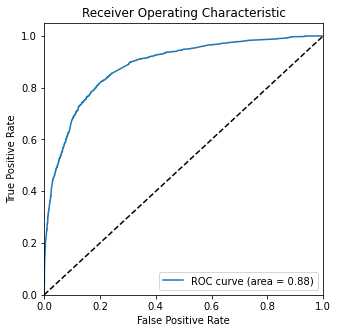

In [289]:
draw_roc(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob)

### Finding optimal value of the cut off

In [290]:
# Predicting Convert status with different probability cutoffs

for i in [float(x)/10 for x in range(10)]:
    y_train_pred_final[i]= y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.266171,1871,0,1,1,1,0,0,0,0,0,0,0
1,0,0.230743,6795,0,1,1,1,0,0,0,0,0,0,0
2,0,0.309480,3516,0,1,1,1,1,0,0,0,0,0,0
3,0,0.815254,8105,1,1,1,1,1,1,1,1,1,1,0
4,0,0.126770,3934,0,1,1,0,0,0,0,0,0,0,0


In [291]:
# Calculating accuracy, sensitivity and specificity for various probability cutoffs from 0.1 to 0.9.

df = pd.DataFrame(columns = ['probability_score','accuracy_score','sensitivity_score','specificity_score','precision_score'])

for i in [float(x)/10 for x in range(10)]:
    (accuracy_score,sensitivity_score,specificity_score,precision_sc) = evaluate_model(y_train_pred_final.Convert, y_train_pred_final[i])
    df.loc[i] =[i,accuracy_score,sensitivity_score,specificity_score,precision_sc]

df

,probability_score,accuracy_score,sensitivity_score,specificity_score,precision_score
0.0,0.0,0.381262,1.000000,0.000000,0.381262
0.1,0.1,0.584725,0.972830,0.345577,0.478079
0.2,0.2,0.747526,0.913625,0.645177,0.613395
0.3,0.3,0.799784,0.838200,0.776112,0.697604
0.4,0.4,0.815090,0.762368,0.847576,0.755020
0.5,0.5,0.816017,0.700324,0.887306,0.792929
0.6,0.6,0.798083,0.595702,0.922789,0.826209
0.7,0.7,0.782931,0.515410,0.947776,0.858784
0.8,0.8,0.764533,0.429846,0.970765,0.900595
0.9,0.9,0.716605,0.274939,0.988756,0.937759


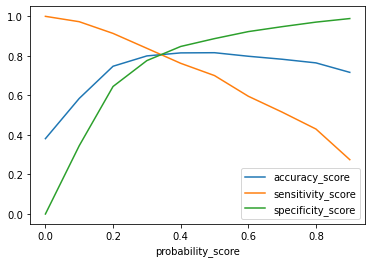

In [292]:
df.plot.line(x='probability_score', y=['accuracy_score','sensitivity_score','specificity_score'])
plt.show()

### Precision-Recall Trade off

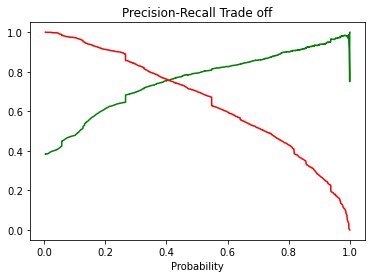

In [293]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xlabel("Probability")
plt.title("Precision-Recall Trade off")
plt.show()

### Observation

- In Sensitivity-Specificity-Accuracy plot 0.35 probability looks optimal. In Precision-Recall Curve 0.4 looks optimal.

- We are taking 0.35 is the optimum point as a cutoff probability and assigning Lead Score in training data

In [294]:
y_train_pred_final = y_train_pred_final.iloc[:, :3]
y_train_pred_final['Convert_predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.35 else 0)

y_train_pred_final['Lead_Score'] = y_train_pred_final.Convert_Prob.map(lambda x: round(x*100))
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID,Convert_predicted,Lead_Score
0,0,0.266171,1871,0,27
1,0,0.230743,6795,0,23
2,0,0.309480,3516,0,31
3,0,0.815254,8105,1,82
4,0,0.126770,3934,0,13


In [295]:
# Evaluating model performance on training data

evaluate_model(y_train_pred_final.Convert, y_train_pred_final.Convert_predicted, print_score=True)

Confusion Matrix :
 [[3278  724]
 [ 503 1963]]
Accuracy : 0.8102968460111317
Sensitivity : 0.7960259529602596
Specificity : 0.8190904547726137
Precision : 0.7305545217714924


(0.8102968460111317,
 0.7960259529602596,
 0.8190904547726137,
 0.7305545217714924)

In [296]:
# Getting the predicted values on the test set
X_test_sm = sm.add_constant(X_test[col])
y_test_pred = res.predict(X_test_sm)

y_test_df = pd.DataFrame(y_test)
y_test_pred_df = pd.DataFrame(y_test_pred, columns=["Converting_Probability"])
y_test_df['Prospect ID'] = y_test_df.index

y_predicted_final = pd.concat([y_test_df.reset_index(drop=True), y_test_pred_df.reset_index(drop=True)],axis=1)
y_predicted_final['final_predicted'] = y_predicted_final.Converting_Probability.map(lambda x: 1 if x > 0.35 else 0)
y_predicted_final['Lead_Score'] = y_predicted_final.Converting_Probability.map(lambda x: round(x*100))

y_predicted_final.head()

,Converted,Prospect ID,Converting_Probability,final_predicted,Lead_Score
0,1,4269,1.000000,1,100
1,1,2376,0.975051,1,98
2,1,7766,1.000000,1,100
3,0,9199,0.137869,0,14
4,1,4359,0.921297,1,92


In [297]:
# Evaluating model performance on test data

evaluate_model(y_predicted_final.Converted, y_predicted_final.final_predicted, print_score=True)

Confusion Matrix :
 [[ 241 1436]
 [  24 1071]]
Accuracy : 0.4733044733044733
Sensitivity : 0.9780821917808219
Specificity : 0.14370900417412044
Precision : 0.42720382927802153


(0.4733044733044733,
 0.9780821917808219,
 0.14370900417412044,
 0.42720382927802153)

### Final Model

In [298]:
# Builds a logistic regression model and returns predicted values on training dataset
# when training data, test data and probability cutoff is given

def build_model_cutoff(X_train, y_train, X_test, y_test, cutoff=0.5):
    
    # Train model
    X_train_sm = sm.add_constant(X_train)
    logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
    res = logm.fit()

    y_train_pred = res.predict(X_train_sm).values.reshape(-1)
    
    y_train_pred_final = pd.DataFrame({'Prospect ID':y_train.index, 'Converted':y_train.values, 'Convert_Probability':y_train_pred})
    y_train_pred_final['Convert_predicted'] = y_train_pred_final.Convert_Probability.map(lambda x: 1 if x > cutoff else 0)
    y_train_pred_final['Lead_Score'] = y_train_pred_final.Convert_Probability.map(lambda x: round(x*100))
    print("------------------Result of training data-------------------")
    print(y_train_pred_final.head())
    
    # Predicting Lead Score on Test data
    X_test_sm = sm.add_constant(X_test)
    y_test_pred = res.predict(X_test_sm)

    y_test_pred_final = pd.DataFrame({'Prospect ID':y_test.index, 'Converted':y_test.values, 'Convert_Probability':y_test_pred})
    y_test_pred_final['Convert_predicted'] = y_test_pred_final.Convert_Probability.map(lambda x: 1 if x > cutoff else 0)
    y_test_pred_final['Lead_Score'] = y_test_pred_final.Convert_Probability.map(lambda x: round(x*100))
    y_test_pred_final.reset_index(inplace=True, drop=True)
    print("------------------Result of test data-------------------")
    print(y_test_pred_final.head())
    
    print("------------------Model Evaluation Metrics-------------------")
    evaluate_model(y_test_pred_final.Converted, y_test_pred_final.Convert_predicted, print_score=True)
    
    return y_test_pred_final

In [299]:
build_model_cutoff(X_train[col], y_train, X_test[col], y_test, cutoff=0.35)

------------------Result of training data-------------------
   Prospect ID  Converted  Convert_Probability  Convert_predicted  Lead_Score
0         1871          0             0.266171                  0          27
1         6795          0             0.230743                  0          23
2         3516          0             0.309480                  0          31
3         8105          0             0.815254                  1          82
4         3934          0             0.126770                  0          13
------------------Result of test data-------------------
   Prospect ID  Converted  Convert_Probability  Convert_predicted  Lead_Score
0         4269          1             1.000000                  1         100
1         2376          1             0.975051                  1          98
2         7766          1             1.000000                  1         100
3         9199          0             0.137869                  0          14
4         4359          

,Prospect ID,Converted,Convert_Probability,Convert_predicted,Lead_Score
0,4269,1,1.000000,1,100
1,2376,1,0.975051,1,98
2,7766,1,1.000000,1,100
3,9199,0,0.137869,0,14
4,4359,1,0.921297,1,92
...,...,...,...,...,...
2767,8649,0,1.000000,1,100
2768,2152,1,0.975051,1,98
2769,7101,0,0.487930,1,49
2770,5331,0,1.000000,1,100


In [300]:
print("Features used in Final Model :", col)

print("-----------------------Feature Importance--------------------")
print(res.params)

Features used in Final Model : Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Other Activity', 'Last Activity_SMS Sent',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Lead Profile_Lateral Student', 'Lead Profile_Student of SomeSchool',
       'How did you hear about X Education_Email',
       'Last Notable Activity_Modified'],
      dtype='object')
-----------------------Feature Importance--------------------
const                                                  -0.160686
Do Not Email                                           -1.243014
Total Time Spent on Website                             1.090896
Lead Origin_Lead Add Form                               3.670449
Lead Source_Olark Chat                                  1.162066
Lead Source_W

### Conclusion:
The logistic regression model predicts the probability of the target variable having a certain value, rather than predicting the value of the target variable directly. Then a cutoff of the probability is used to obtain the predicted value of the target variable.
Here, the logistic regression model is used to predict the probabilty of conversion of a customer.
Optimum cut off is chosen to be 0.27 i.e. any lead with greater than 0.27 probability of converting is predicted as Hot Lead (customer will convert) and any lead with 0.27 or less probability of converting is predicted as Cold Lead (customer will not convert)
Our final Logistic Regression Model is built with 14 features.
Features used in final model are:
['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Other Activity', 'Last Activity_SMS Sent',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Lead Profile_Lateral Student', 'Lead Profile_Student of SomeSchool',
       'How did you hear about X Education_Email',
       'Last Notable Activity_Modified']




The final model has Sensitivity of 0.978, this means the model is able to predict 98% customers out of all the converted customers, (Positive conversion) correctly.
The final model has Precision of 0.427, this means 43% of predicted hot leads are True Hot Leads.


### Subjective Question
X Education has a period of 2 months every year during which they hire some interns. The sales team, in particular, has around 10 interns allotted to them. So during this phase, they wish to make the lead conversion more aggressive. So they want almost all of the potential leads (i.e. the customers who have been predicted as 1 by the model) to be converted and hence, want to make phone calls to as much of such people as possible. Suggest a good strategy they should employ at this stage.

In [301]:
# Here in this scenerio cutoff of 0.1 should be used as We have built a reusable model which will predict Convert value and Lead Score given training, test data and a cut-off.
#Different cutoffs can be used depending on the use-cases (for eg. when high sensitivity is required, when model have optimum precision score etc.)
build_model_cutoff(X_train[col], y_train, X_test[col], y_test, cutoff=0.1)

------------------Result of training data-------------------
   Prospect ID  Converted  Convert_Probability  Convert_predicted  Lead_Score
0         1871          0             0.266171                  1          27
1         6795          0             0.230743                  1          23
2         3516          0             0.309480                  1          31
3         8105          0             0.815254                  1          82
4         3934          0             0.126770                  1          13
------------------Result of test data-------------------
   Prospect ID  Converted  Convert_Probability  Convert_predicted  Lead_Score
0         4269          1             1.000000                  1         100
1         2376          1             0.975051                  1          98
2         7766          1             1.000000                  1         100
3         9199          0             0.137869                  1          14
4         4359          

,Prospect ID,Converted,Convert_Probability,Convert_predicted,Lead_Score
0,4269,1,1.000000,1,100
1,2376,1,0.975051,1,98
2,7766,1,1.000000,1,100
3,9199,0,0.137869,1,14
4,4359,1,0.921297,1,92
...,...,...,...,...,...
2767,8649,0,1.000000,1,100
2768,2152,1,0.975051,1,98
2769,7101,0,0.487930,1,49
2770,5331,0,1.000000,1,100


### Subjective Question
Similarly, at times, the company reaches its target for a quarter before the deadline. During this time, the company wants the sales team to focus on some new work as well. So during this time, the company’s aim is to not make phone calls unless it’s extremely necessary, i.e. they want to minimize the rate of useless phone calls. Suggest a strategy they should employ at this stage.

In [302]:
# In such scenerios the cutoff should be kept 0.9, # Here in this scenerio cutoff of 0.1 should be used as We have built a reusable model which will predict Convert value and Lead Score given training, test data and a cut-off.
#Different cutoffs can be used depending on the use-cases (for eg. when high sensitivity is required, when model have optimum precision score etc.)
build_model_cutoff(X_train[col], y_train, X_test[col], y_test, cutoff=0.9)

------------------Result of training data-------------------
   Prospect ID  Converted  Convert_Probability  Convert_predicted  Lead_Score
0         1871          0             0.266171                  0          27
1         6795          0             0.230743                  0          23
2         3516          0             0.309480                  0          31
3         8105          0             0.815254                  0          82
4         3934          0             0.126770                  0          13
------------------Result of test data-------------------
   Prospect ID  Converted  Convert_Probability  Convert_predicted  Lead_Score
0         4269          1             1.000000                  1         100
1         2376          1             0.975051                  1          98
2         7766          1             1.000000                  1         100
3         9199          0             0.137869                  0          14
4         4359          

,Prospect ID,Converted,Convert_Probability,Convert_predicted,Lead_Score
0,4269,1,1.000000,1,100
1,2376,1,0.975051,1,98
2,7766,1,1.000000,1,100
3,9199,0,0.137869,0,14
4,4359,1,0.921297,1,92
...,...,...,...,...,...
2767,8649,0,1.000000,1,100
2768,2152,1,0.975051,1,98
2769,7101,0,0.487930,0,49
2770,5331,0,1.000000,1,100


### Q.	Which are the top three variables in your model which contribute most towards the probability of a lead getting converted?

A. The top three categorical/dummy variables in the final model are ‘Lead Origin_Lead Add Form’, ‘Lead Profile_Lateral Student’, ‘Last Activity_Other Activity’ with respect to the absolute value of their coefficient factors.
